In [1]:
# Tarefa:

# Gerar gráficos com as bases de dados dos meses de
# março, abril, maio, junho e dezembro:


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
df = pd.read_csv("/content/SINASC_RO_2019.csv")
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [12]:
df = df.drop_duplicates()


In [13]:
# Selecionando apenas as variáveis que no momento serão pertinentes:

df = df[["DTNASC", "IDADEMAE", "SEXO", "APGAR1", "APGAR5", "PESO",
         "CONSULTAS", "GESTACAO", "GRAVIDEZ", "ESCMAE", "IDADEPAI"]]

df.head()

,DTNASC,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,2019-02-19,19,Masculino,9.0,10.0,3685,4,37 a 41 semanas,Única,8 a 11 anos,26.0
1,2019-02-21,29,Feminino,8.0,9.0,3055,4,37 a 41 semanas,Única,8 a 11 anos,24.0
2,2019-02-25,37,Feminino,8.0,10.0,3460,4,37 a 41 semanas,Única,8 a 11 anos,32.0
3,2019-03-20,30,Feminino,9.0,10.0,2982,3,37 a 41 semanas,Única,12 anos ou mais,24.0
4,2019-03-23,30,Feminino,8.0,10.0,3310,4,37 a 41 semanas,Única,8 a 11 anos,27.0


In [14]:
df.shape

(27028, 11)

In [15]:
df = df.dropna()

df.shape

(7203, 11)

* Criando uma função que me retorna o dataframe segundo o mês desejado. Ela será útil no processo de automatização na produção de gráficos à análise, bastando passar, além dos outros parâmetros necessários no contexto, o nome do dataframe e o mês desejado.

In [98]:
def mes_requisitado(nome_df, mes):

  # Copiando os dados do df original e já tratado:
  nome_df = df.copy()


  # Convertendo a coluna 'DTNASC' para o tipo datetime
  # para que eu consiga selecionar cada mês desejado.
  nome_df['DTNASC'] = pd.to_datetime(nome_df['DTNASC'])

  # Selecionando apenas os dados relativos ao mês desejado.
  nome_df = nome_df[nome_df['DTNASC'].dt.month == mes]

  return nome_df



In [101]:
# A função funciona.
mes_requisitado("df_Mai", 4).head()

,DTNASC,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
6,2019-04-01,37,Feminino,9.0,10.0,3158,4,37 a 41 semanas,Única,8 a 11 anos,42.0
7,2019-04-01,27,Feminino,9.0,10.0,3192,4,37 a 41 semanas,Única,12 anos ou mais,27.0
21,2019-04-05,31,Feminino,9.0,10.0,3608,4,37 a 41 semanas,Única,12 anos ou mais,37.0
22,2019-04-05,25,Feminino,9.0,10.0,3152,3,37 a 41 semanas,Única,4 a 7 anos,25.0
23,2019-04-08,26,Masculino,9.0,10.0,2480,4,37 a 41 semanas,Dupla,8 a 11 anos,43.0


In [ ]:
# Copiando os dados do df original e já tratado:
df_Mar = df.copy()

# Convertendo a coluna 'DTNASC' para o tipo datetime
# para que eu consiga selecionar cada mês desejado.
df_Mar['DTNASC'] = pd.to_datetime(df_Mar['DTNASC'])

# Selecionando apenas os dados relativos ao mês desejado.
df_Mar = df_Mar[df_Mar['DTNASC'].dt.month == 3]

df_Mar

**Realizando à exploração gráfica:**

* APGAR1

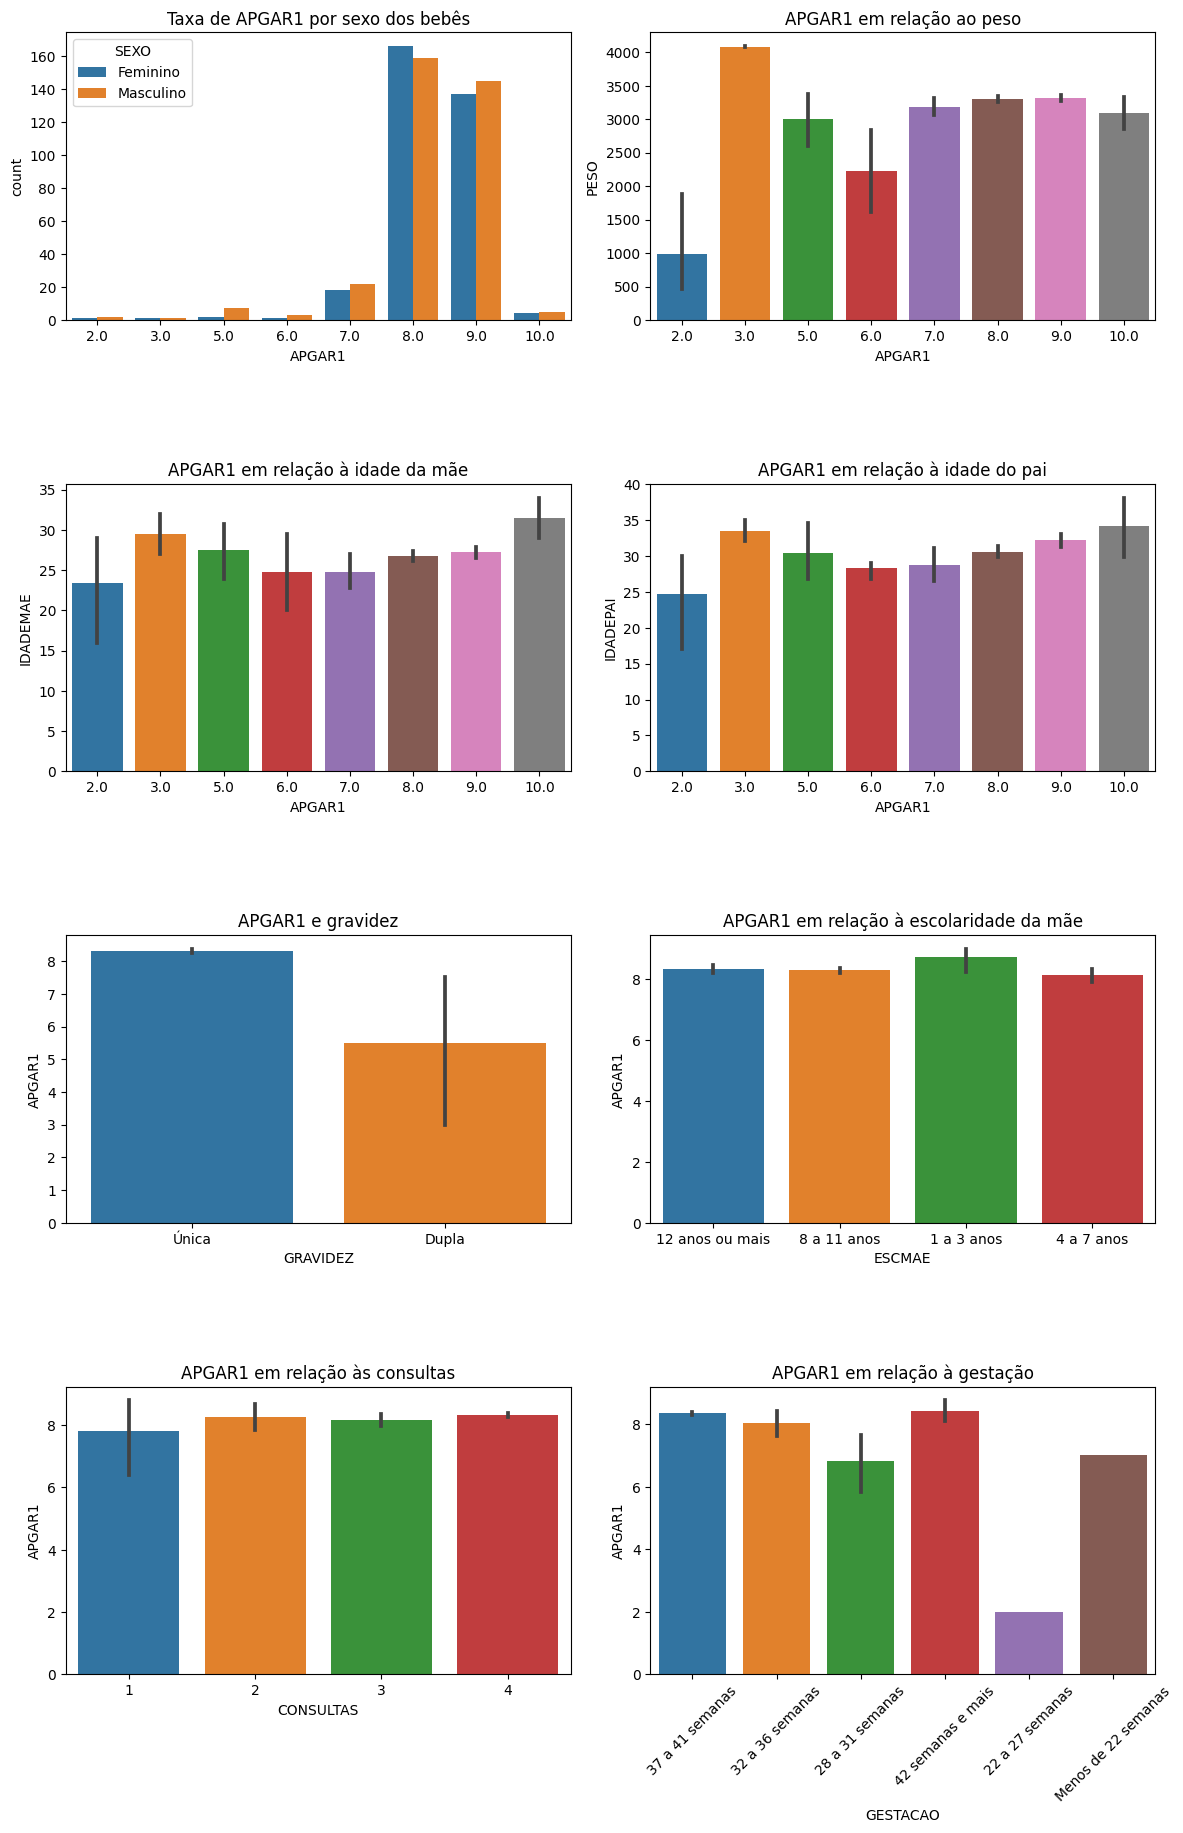

In [81]:
# Ajustando o tamanho da figura principal
fig = plt.figure(figsize=(12, 35))

# Criando uma plotagem que terá como base a criação de
# 8 gráficos:
gs = fig.add_gridspec(8, 2, height_ratios=[4, 4, 4, 4, 4, 4, 4, 4])

# Contagem de APGAR1 por sexo.
ax0 = fig.add_subplot(gs[0, 0])
sns.countplot(x="APGAR1", hue="SEXO", data=df_Mar, ax=ax0)
ax0.set_title("Taxa de APGAR1 por sexo dos bebês")

# Realizando um gráfico de APGAR1 em relação ao peso.
ax1 = fig.add_subplot(gs[0, 1])
sns.barplot(x="APGAR1", y="PESO", data=df_Mar, ax=ax1)
ax1.set_title("APGAR1 em relação ao peso")

# Realizando um gráfico de APGAR1 em relação à idade da mãe.
ax2 = fig.add_subplot(gs[1, 0])
sns.barplot(x="APGAR1", y="IDADEMAE", data=df_Mar, ax=ax2)
ax2.set_title("APGAR1 em relação à idade da mãe")

# Realizando um gráfico de APGAR1 em relação à idade do pai.
ax3 = fig.add_subplot(gs[1, 1])
sns.barplot(x="APGAR1", y="IDADEPAI", data=df_Mar, ax=ax3)
ax3.set_title("APGAR1 em relação à idade do pai")

# Realizando um gráfico de APGAR1 em relação à gravidez.
ax4 = fig.add_subplot(gs[2, 0])
sns.barplot(x="GRAVIDEZ", y="APGAR1",data=df_Mar)
ax4.set_title("APGAR1 e gravidez")

# Realizando um gráfico de APGAR1 em relação à escolaridade da mãe.
ax5 = fig.add_subplot(gs[2, 1])
sns.barplot(x="ESCMAE", y="APGAR1", data=df_Mar)
ax5.set_title("APGAR1 em relação à escolaridade da mãe")

# Realizando um gráfico de APGAR1 em relação às consultas.
ax6 = fig.add_subplot(gs[3, 0])
sns.barplot(x="CONSULTAS", y="APGAR1", data=df_Mar)
ax6.set_title("APGAR1 em relação às consultas")

# Realizando um gráfico de APGAR1 em relação à gestação.
ax7 = fig.add_subplot(gs[3, 1])
sns.barplot(x="GESTACAO", y="APGAR1", data=df_Mar)
ax7.set_title("APGAR1 em relação à gestação")

# Ajustar o ângulo dos rótulos do eixo x
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45, ha='right')

# Ajustando o layout para evitar sobreposição de rótulos
plt.tight_layout()

# Exibindo o gráfico
plt.show()


* APGAR5:

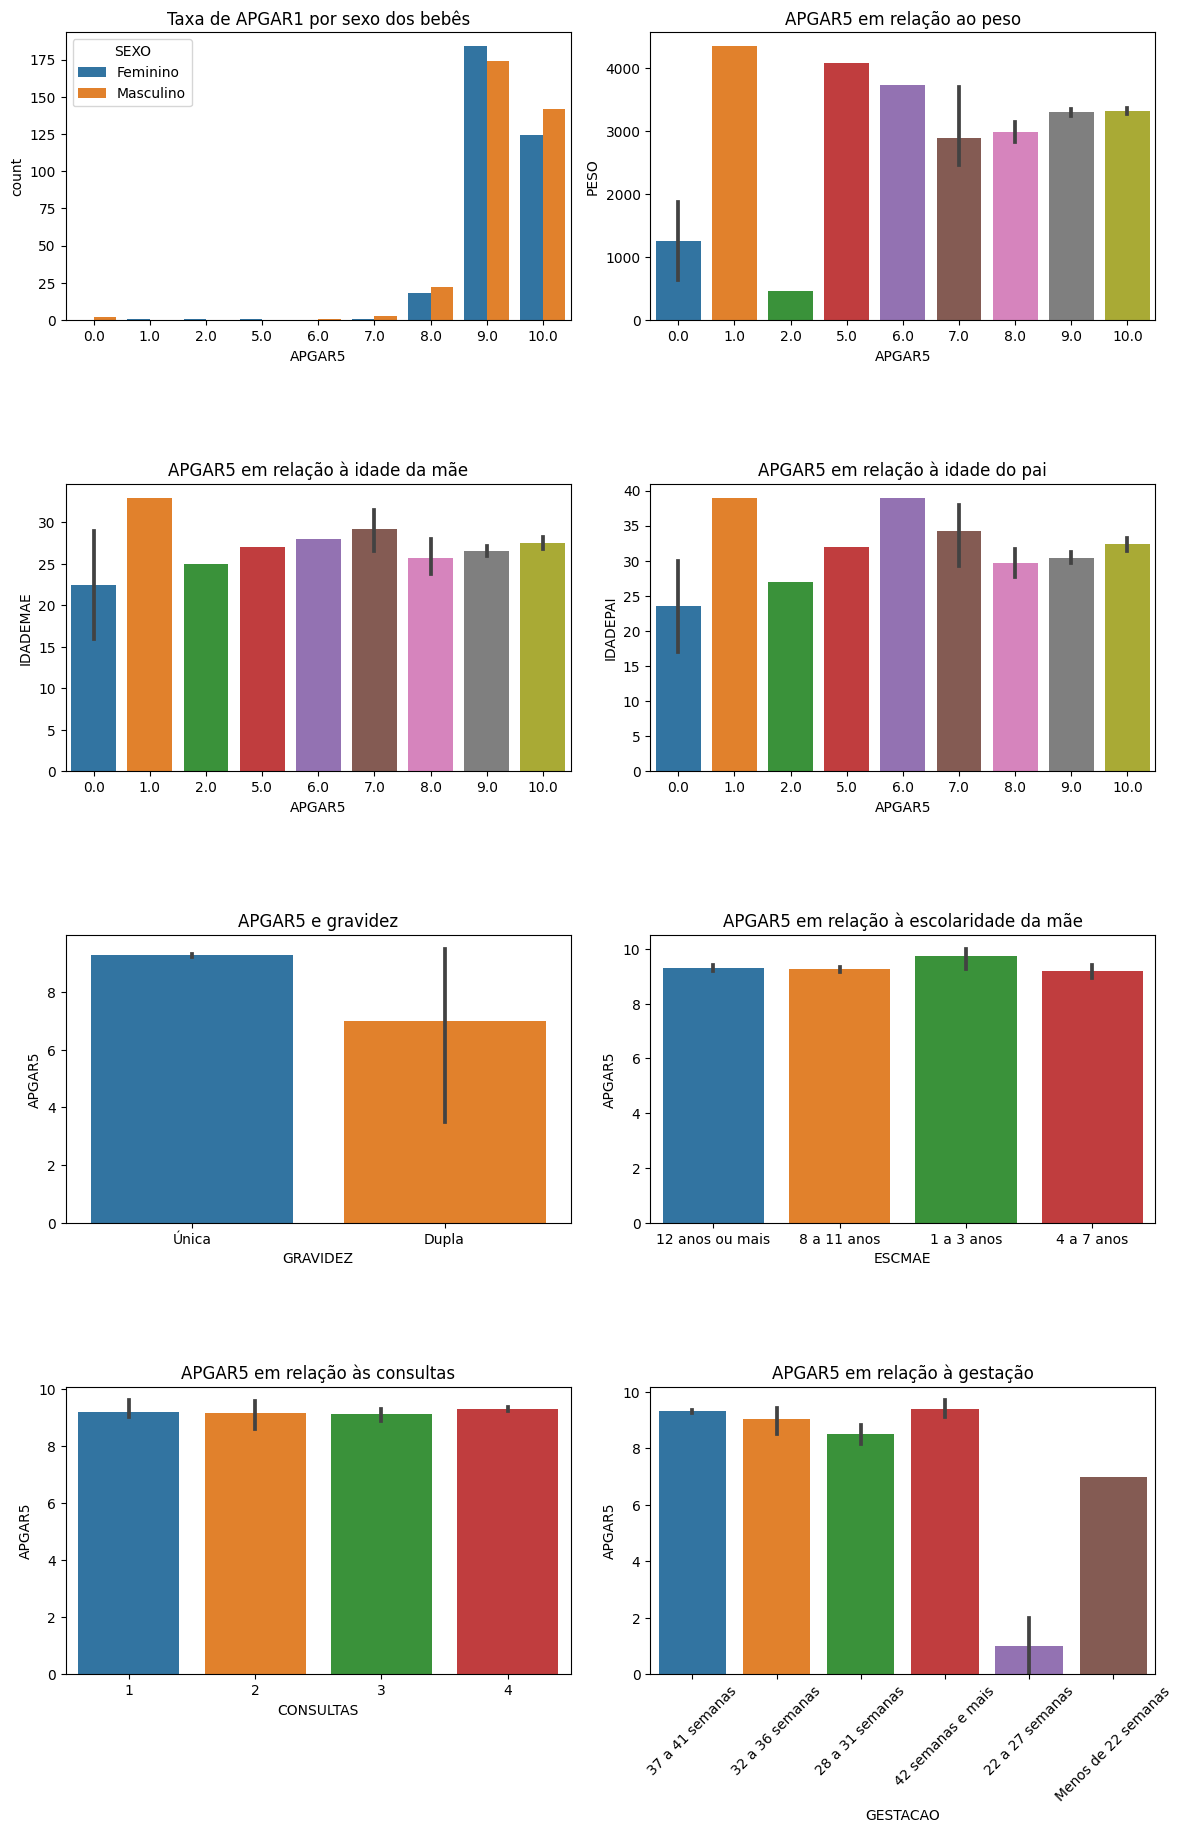

In [82]:
# Ajustando o tamanho da figura principal
fig = plt.figure(figsize=(12, 35))

# Criando uma plotagem que terá como base a criação de
# 8 gráficos:
gs = fig.add_gridspec(8, 2, height_ratios=[4, 4, 4, 4, 4, 4, 4, 4])

# Contagem de APGAR1 por sexo.
ax0 = fig.add_subplot(gs[0, 0])
sns.countplot(x="APGAR5", hue="SEXO", data=df_Mar, ax=ax0)
ax0.set_title("Taxa de APGAR1 por sexo dos bebês")

# Realizando um gráfico de APGAR1 em relação ao peso.
ax1 = fig.add_subplot(gs[0, 1])
sns.barplot(x="APGAR5", y="PESO", data=df_Mar, ax=ax1)
ax1.set_title("APGAR5 em relação ao peso")

# Realizando um gráfico de APGAR1 em relação à idade da mãe.
ax2 = fig.add_subplot(gs[1, 0])
sns.barplot(x="APGAR5", y="IDADEMAE", data=df_Mar, ax=ax2)
ax2.set_title("APGAR5 em relação à idade da mãe")

# Realizando um gráfico de APGAR1 em relação à idade do pai.
ax3 = fig.add_subplot(gs[1, 1])
sns.barplot(x="APGAR5", y="IDADEPAI", data=df_Mar, ax=ax3)
ax3.set_title("APGAR5 em relação à idade do pai")

# Realizando um gráfico de APGAR1 em relação à gravidez.
ax4 = fig.add_subplot(gs[2, 0])
sns.barplot(x="GRAVIDEZ", y="APGAR5",data=df_Mar)
ax4.set_title("APGAR5 e gravidez")

# Realizando um gráfico de APGAR1 em relação à escolaridade da mãe.
ax5 = fig.add_subplot(gs[2, 1])
sns.barplot(x="ESCMAE", y="APGAR5", data=df_Mar)
ax5.set_title("APGAR5 em relação à escolaridade da mãe")

# Realizando um gráfico de APGAR1 em relação às consultas.
ax6 = fig.add_subplot(gs[3, 0])
sns.barplot(x="CONSULTAS", y="APGAR5", data=df_Mar)
ax6.set_title("APGAR5 em relação às consultas")

# Realizando um gráfico de APGAR1 em relação à gestação.
ax7 = fig.add_subplot(gs[3, 1])
sns.barplot(x="GESTACAO", y="APGAR5", data=df_Mar)
ax7.set_title("APGAR5 em relação à gestação")

# Ajustar o ângulo dos rótulos do eixo x
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45, ha='right')

# Ajustando o layout para evitar sobreposição de rótulos
plt.tight_layout()

# Exibindo o gráfico
plt.show()


* Gerando demais gráficos:

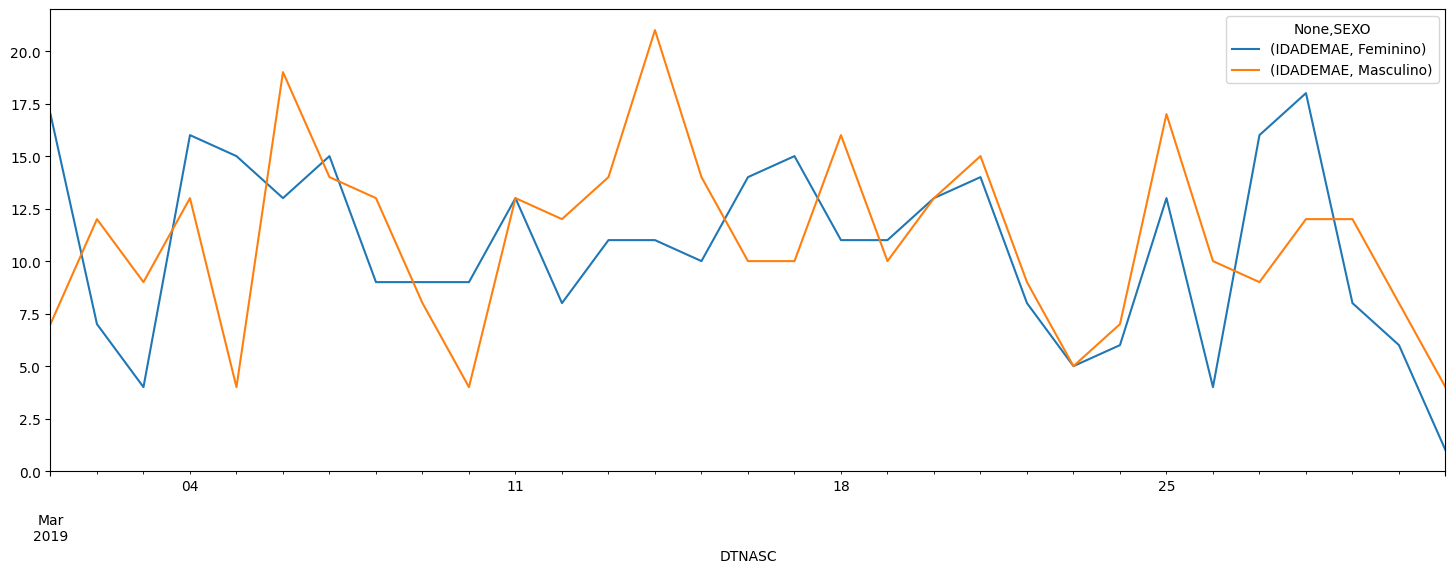

In [83]:
pd.pivot_table(df_Mar, values='IDADEMAE', index=['DTNASC', 'SEXO'],
               aggfunc='count').unstack().plot(figsize=[18, 6]);

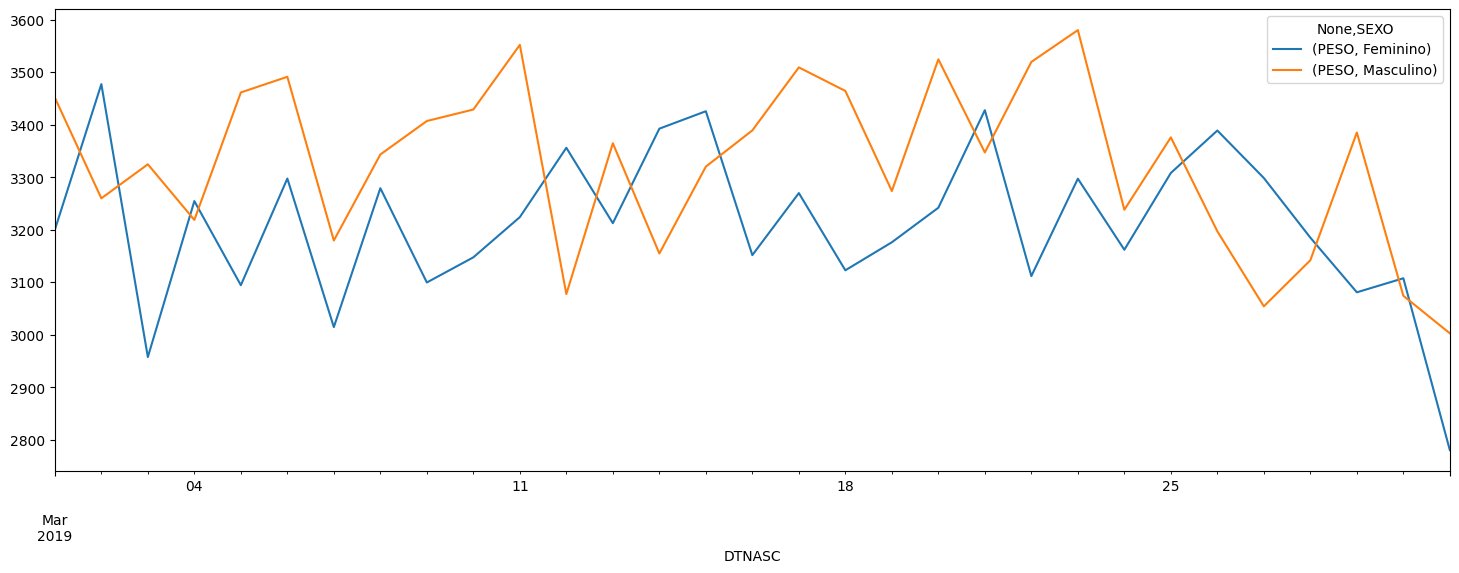

In [84]:
pd.pivot_table(df_Mar, values='PESO', index=['DTNASC', 'SEXO'],
               aggfunc='mean').unstack().plot(figsize=[18, 6]);


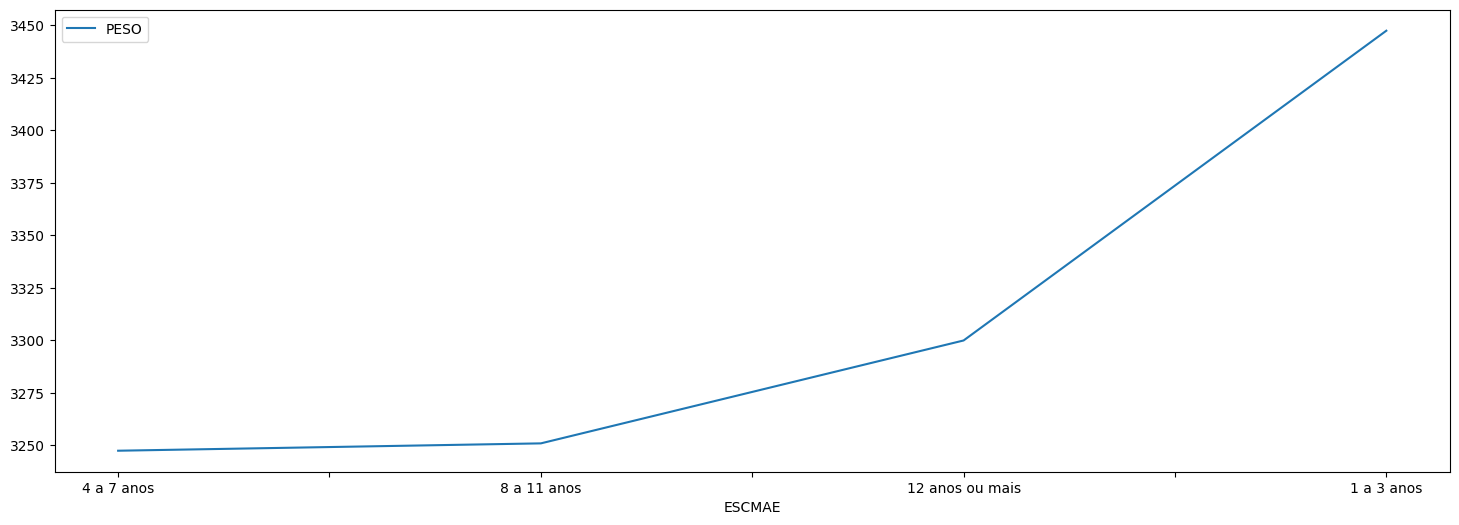

In [85]:
pd.pivot_table(df_Mar, values='PESO', index=['ESCMAE'],
               aggfunc='median').sort_values('PESO').plot(figsize=[18, 6]);

Text(0.5, 0, 'gestação')

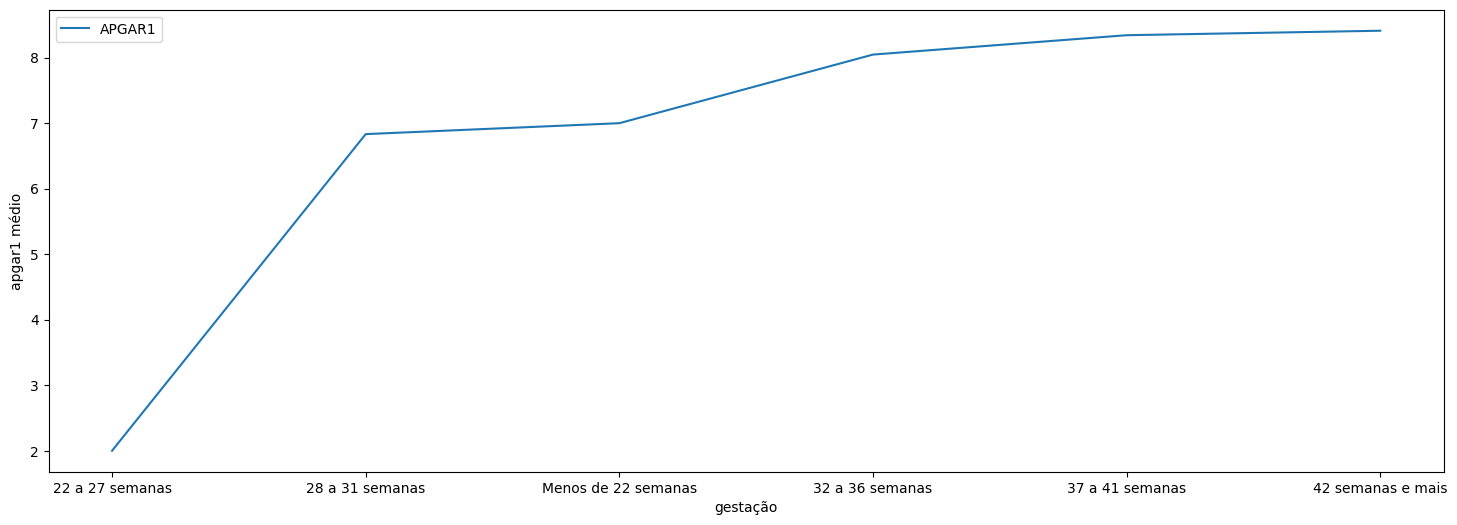

In [86]:
pd.pivot_table(df_Mar, values='APGAR1', index=['GESTACAO'],
               aggfunc='mean').sort_values('APGAR1').plot(figsize=[18, 6])

plt.ylabel("apgar1 médio")
plt.xlabel("gestação")


Text(0.5, 0, 'gestação')

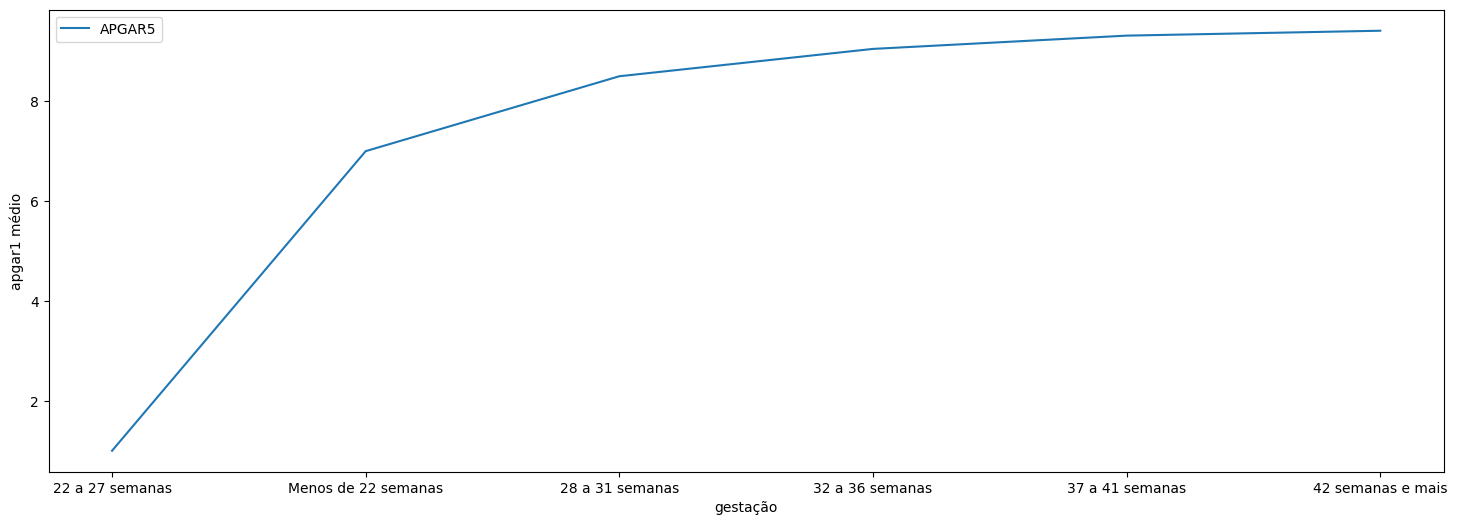

In [87]:
pd.pivot_table(df_Mar, values='APGAR5', index=['GESTACAO'],
               aggfunc='mean').sort_values('APGAR5').plot(figsize=[18, 6])

plt.ylabel("apgar1 médio")
plt.xlabel("gestação")


**Criando funções que automatize o processo de análise:**

In [ ]:
def mes_requisitado(nome_df, mes):

  # Separando um daframe para cada mês requisitado

  nome_df = df.copy()


  # Convertendo a coluna 'DTNASC' para o tipo datetime
  nome_df['DTNASC'] = pd.to_datetime(nome_df['DTNASC'])

  # Selecionando apenas os dados relativos ao mês de fevereiro
  nome_df = nome_df[nome_df['DTNASC'].dt.month == mes]

  return nome_df

In [106]:
def graficos(nome_df, mes, value, index, function, ylabel, xlabel, opcao):

  if opcao == "nada":

    pd.pivot_table(mes_requisitado(nome_df, mes), values=value, index=index,
                aggfunc=function).plot(figsize=[18, 6])

  elif opcao == "unstack":

    pd.pivot_table(mes_requisitado(nome_df, mes), values=value, index=index,
                aggfunc=function).unstack().plot(figsize=[18, 6])

  elif opcao == "sort_values":

    pd.pivot_table(mes_requisitado(nome_df, mes), values=value, index=index,
                aggfunc=function).sort_values(value).plot(figsize=[18, 6])

  plt.ylabel(ylabel)
  plt.xlabel(xlabel)


* Exemplo:

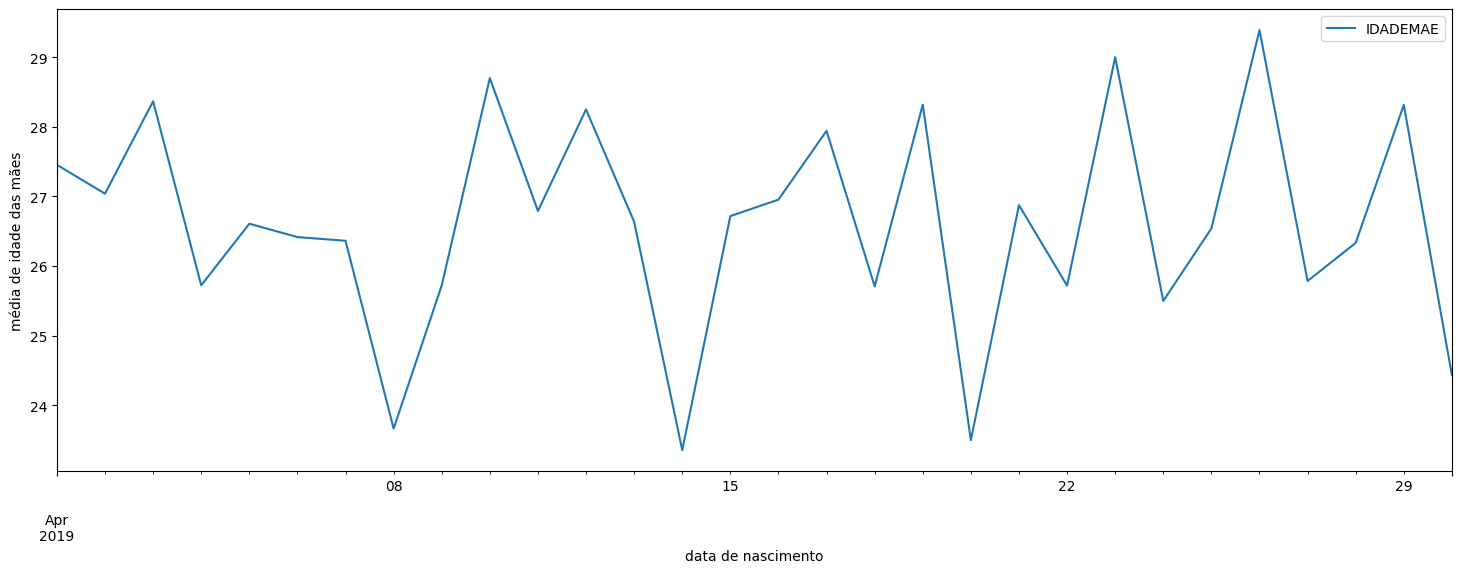

In [105]:
graficos("df_Mar", 4, "IDADEMAE", "DTNASC", "mean", "média de idade das mães",
         "data de nascimento", "nada")

In [114]:
def analiseAPGAR(APGAR, nome_df, mes):

  # Ajustando o tamanho da figura principal
  fig = plt.figure(figsize=(12, 35))

  # Criando uma plotagem que terá como base a criação de
  # 8 gráficos:
  gs = fig.add_gridspec(8, 2, height_ratios=[4, 4, 4, 4, 4, 4, 4, 4])

  # Contagem de APGAR1 por sexo.
  ax0 = fig.add_subplot(gs[0, 0])
  sns.countplot(x=APGAR, hue="SEXO", data=mes_requisitado(nome_df, mes), ax=ax0)
  ax0.set_title(f"Taxa de {APGAR} por sexo dos bebês")

  # Realizando um gráfico de APGAR1 em relação ao peso.
  ax1 = fig.add_subplot(gs[0, 1])
  sns.barplot(x=APGAR, y="PESO", data=mes_requisitado(nome_df, mes), ax=ax1)
  ax1.set_title(f"{APGAR} em relação ao peso")

  # Realizando um gráfico de APGAR1 em relação à idade da mãe.
  ax2 = fig.add_subplot(gs[1, 0])
  sns.barplot(x=APGAR, y="IDADEMAE", data=mes_requisitado(nome_df, mes), ax=ax2)
  ax2.set_title(f"{APGAR} em relação à idade da mãe")

  # Realizando um gráfico de APGAR1 em relação à idade do pai.
  ax3 = fig.add_subplot(gs[1, 1])
  sns.barplot(x=APGAR, y="IDADEPAI", data=mes_requisitado(nome_df, mes), ax=ax3)
  ax3.set_title(f"{APGAR} em relação à idade do pai")

  # Realizando um gráfico de APGAR1 em relação à gravidez.
  ax4 = fig.add_subplot(gs[2, 0])
  sns.barplot(x="GRAVIDEZ", y=APGAR,data=mes_requisitado(nome_df, mes))
  ax4.set_title(f"{APGAR} e gravidez")

  # Realizando um gráfico de APGAR1 em relação à escolaridade da mãe.
  ax5 = fig.add_subplot(gs[2, 1])
  sns.barplot(x="ESCMAE", y=APGAR, data=mes_requisitado(nome_df, mes))
  ax5.set_title(f"{APGAR} em relação à escolaridade da mãe")

  # Realizando um gráfico de APGAR1 em relação às consultas.
  ax6 = fig.add_subplot(gs[3, 0])
  sns.barplot(x="CONSULTAS", y=APGAR, data=mes_requisitado(nome_df, mes))
  ax6.set_title(f"{APGAR} em relação às consultas")

  # Realizando um gráfico de APGAR1 em relação à gestação.
  ax7 = fig.add_subplot(gs[3, 1])
  sns.barplot(x="GESTACAO", y=APGAR, data=mes_requisitado(nome_df, mes))
  ax7.set_title(f"{APGAR} em relação à gestação")

  # Ajustar o ângulo dos rótulos do eixo x
  ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45, ha='right')

  # Ajustando o layout para evitar sobreposição de rótulos
  plt.tight_layout()

  # Exibindo o gráfico
  plt.show()


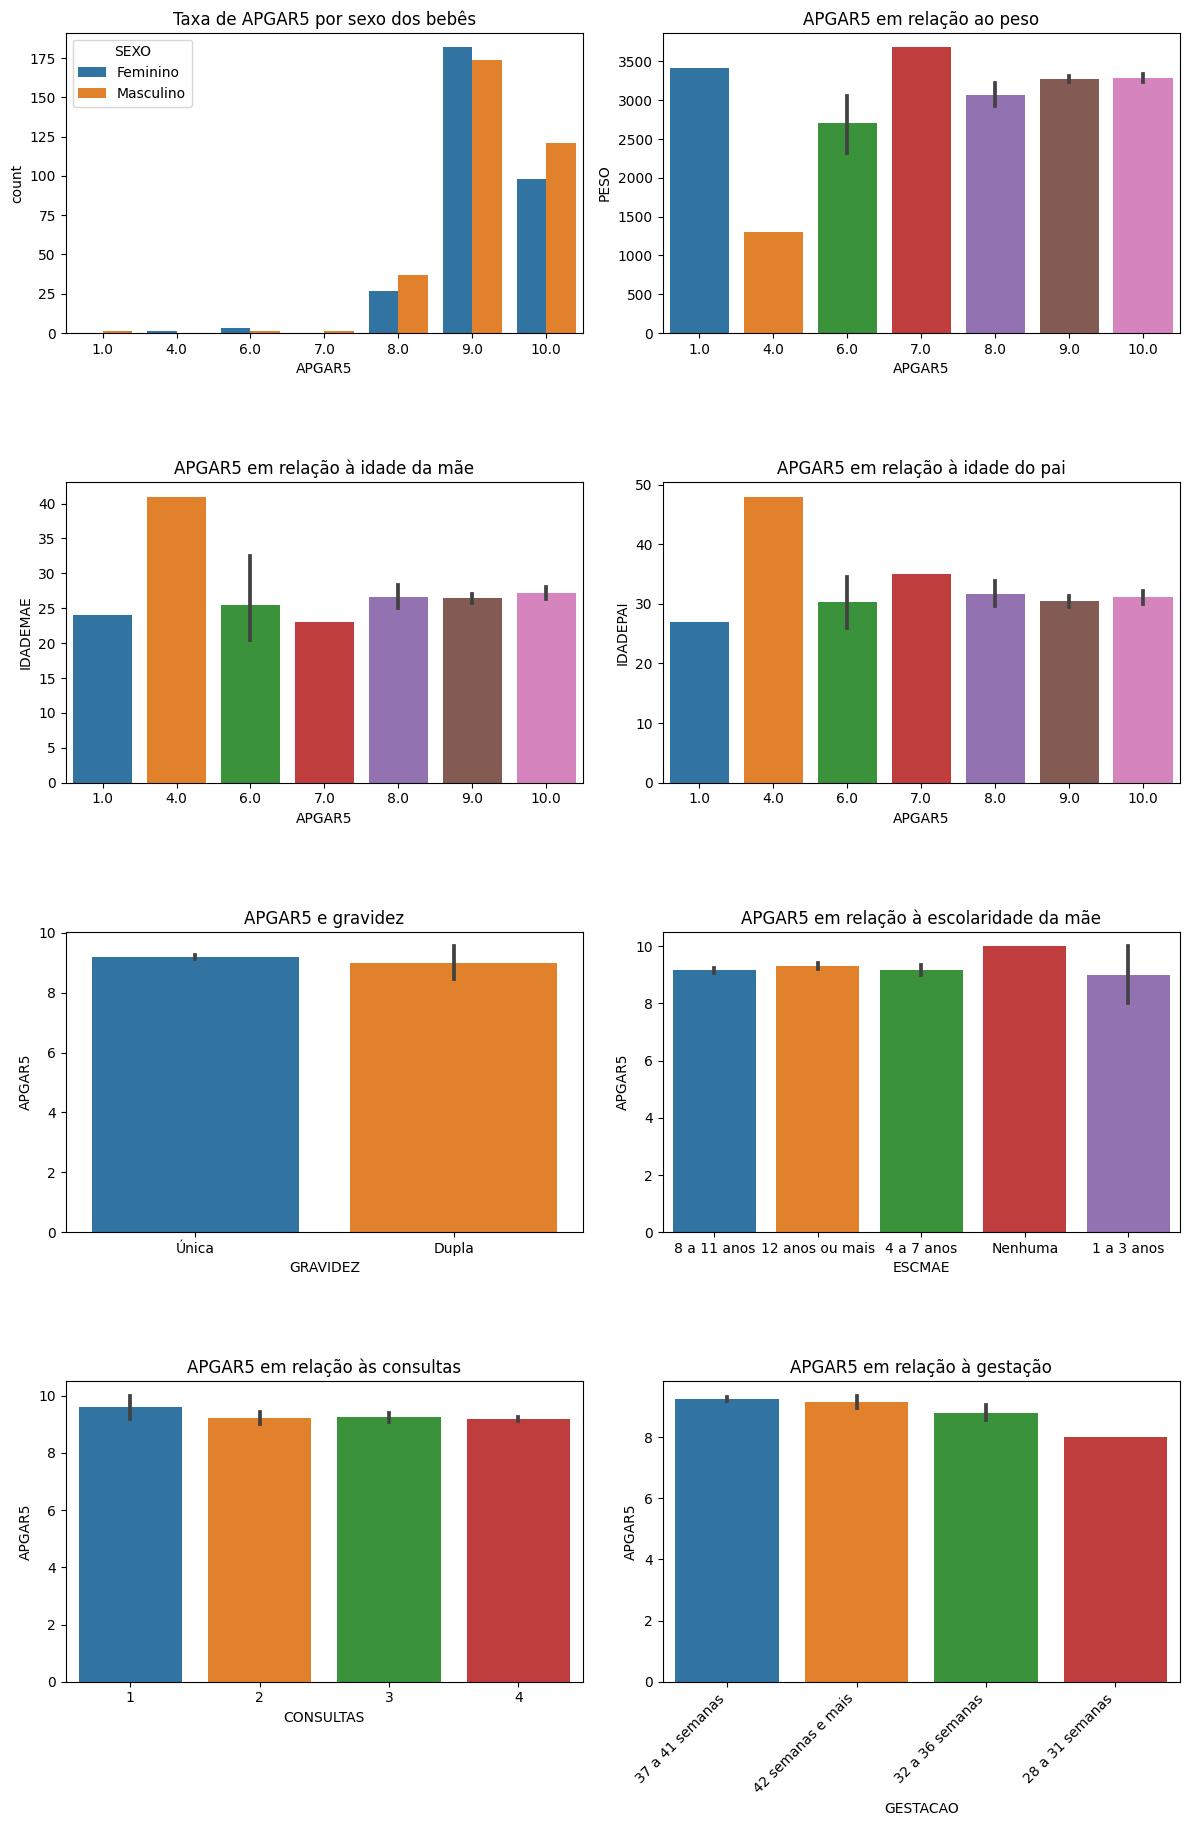

In [116]:
analiseAPGAR("APGAR5","df_Mai", 4)